In [18]:
from importlib import reload
import h5py
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import matplotlib.patches as pt
import utility_functions
import meshio
import evaluations

In [19]:
path_conductivities = 'data/conductivities.txt'
point = np.array([80,150])

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_ref_l0.h5')
ref = np.array( fin['/samples'] )
fin.close()

num = len(ref[0,:])
start = 0
end = num

TEST
TEST
TEST


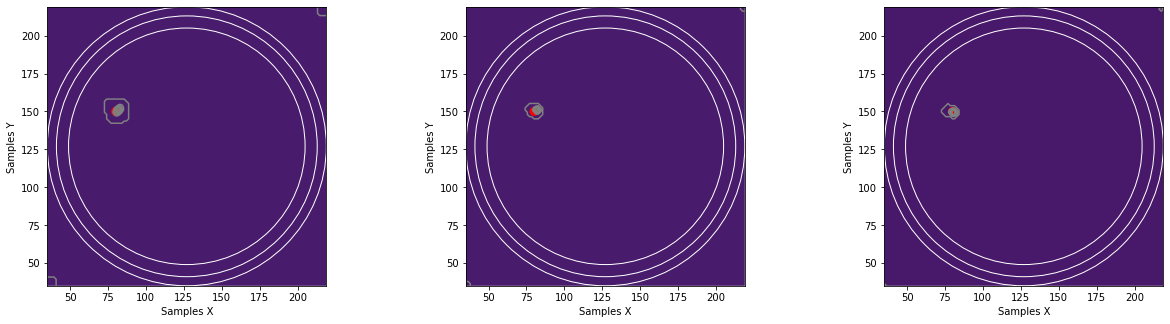

In [20]:
path_mesh = "data/mesh_20_3.msh"

fig, ax = plt.subplots(1, 3, figsize=(20,30))
fig.subplots_adjust(wspace=.5)

evaluations.draw_densities(ref[:,start:1000],ax[0])
evaluations.draw_densities(ref[:,start:10000],ax[1])
evaluations.draw_densities(ref[:,start:end],ax[2])

evaluations.set_ax(ax[0],point)
evaluations.set_ax(ax[1],point)
evaluations.set_ax(ax[2],point)

In [84]:
centers = evaluations.get_midpoints(meshio.read(path_mesh))

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_levels_l0.h5')
samples = np.array( fin['/samples'] )
fin.close()

fin = h5py.File('/home/anne/Masterarbeit/masterarbeit/results/samples_2d_1_mlda.h5')
mlda_samples = np.array( fin['/samples'] )
fin.close()

bins_ref = evaluations.binning(centers,ref[:,:])
bins_ref = bins_ref/len(ref[0,:])
print(len(ref[0,:]))
bins_1 = evaluations.binning(centers,samples[:,:5000])
bins_1 = bins_1/len(samples[0,:5000])
print(len(samples[0,:5000]))
bins_2 = evaluations.binning(centers,mlda_samples[:,:1000])
bins_2 = bins_2/len(mlda_samples[0,:1000])
print(len(mlda_samples[0,:1000]))

error = np.linalg.norm(bins_ref-bins_1,2)
print(error)

error = np.linalg.norm(bins_ref-bins_2,2)
print(error)


200000
5000
1000
0.38784778992537783
0.24285907878850238


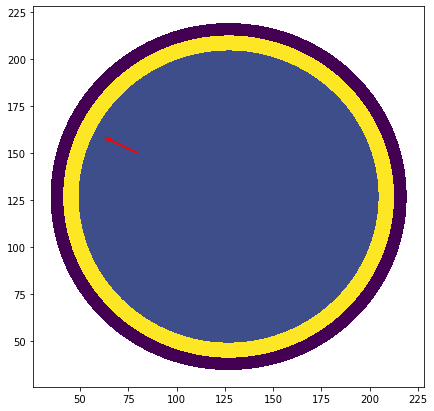

In [71]:
reload(utility_functions)
reload(evaluations)

fig, ax = plt.subplots(1, 1, figsize=(7,7))
fig.subplots_adjust(wspace=.5)

evaluations.draw_model(path_mesh, path_conductivities, point, (127,127), ax)